In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns  # Imorting Seaborn library
from keras.utils import np_utils

from google.colab import files
uploaded = files.upload()
import io
Breast_Cancer_Data = pd.read_excel(io.BytesIO(uploaded['Wisconsin Breast Cancer Data (Classification).xlsx']))
# Dataset is now stored in a Pandas Dataframe

Saving Wisconsin Breast Cancer Data (Classification).xlsx to Wisconsin Breast Cancer Data (Classification).xlsx


In [ ]:
Breast_Cancer_Data.head() #Checking that it uplaoded as a Pandas Data Frame

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
Breast_Cancer_Data['diagnosis'].describe()

count     569
unique      2
top         B
freq      357
Name: diagnosis, dtype: object

In [ ]:
Breast_Cancer_Data.drop(['id'], axis=1, inplace=True)

In [ ]:
Breast_Cancer_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [ ]:
Breast_Cancer_Data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
X = Breast_Cancer_Data.loc[:, Breast_Cancer_Data.columns != 'diagnosis']
y = Breast_Cancer_Data['diagnosis']
y = y.replace({'M': 0})
y = y.replace({'B': 1})
#Setting Variables as X and y



In [ ]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.2, random_state= 0)
#splitting data into test and train data. 80% will be used for training and 20% for testing.

In [ ]:
y_train.describe()

count    455.000000
mean       0.637363
std        0.481291
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: diagnosis, dtype: float64

In [ ]:
# Least Squares Linear Discriminant Analysis

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
least_squares_discriminant_analysis = LinearDiscriminantAnalysis(solver='lsqr',shrinkage = 'auto')
least_squares_discriminant_analysis.fit(X_train, y_train)

LinearDiscriminantAnalysis(shrinkage='auto', solver='lsqr')

In [ ]:
from sklearn.metrics import r2_score  # For find accuracy with R2 Score
from sklearn.metrics import mean_squared_error  # For MSE
from math import sqrt  # For squareroot operation

y_pred_LDA_train = least_squares_discriminant_analysis.predict(X_train)
y_pred_LDA_test = least_squares_discriminant_analysis.predict(X_test)

accuracy_LDA_train = r2_score(y_train, y_pred_LDA_train)
print("Training Accuracy Least Squares Linear Discriminant Analysis Model: ", accuracy_LDA_train)

accuracy_LDA_test = r2_score(y_test, y_pred_LDA_test)
print("Testing Accuracy for Least Squares Linear Discriminant Analysis Model: ", accuracy_LDA_test)


Training Accuracy Least Squares Linear Discriminant Analysis Model:  0.8383490073145246
Testing Accuracy for Least Squares Linear Discriminant Analysis Model:  0.8551921244839631


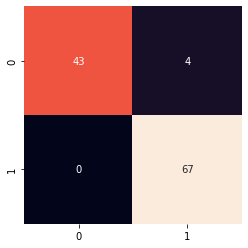

In [ ]:
from sklearn.metrics import confusion_matrix
matrix_confusion = confusion_matrix(y_test, y_pred_LDA_test)

sns.heatmap(matrix_confusion, square=True, annot=True, fmt='d', cbar=False )
plt.show()

Naive Bayes Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

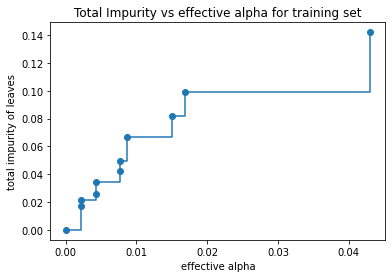

In [ ]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")


In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.32027199074911666


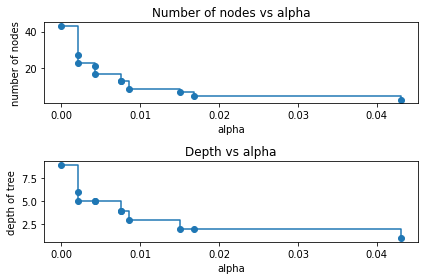

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

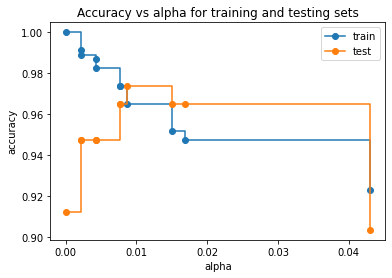

In [ ]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

You can see that with a default alpha value of 0, the decision tree overfits the data. Setting a value for alpha that maximizes the accuracy of the test score is 0.01

In [ ]:
decision_tree = DecisionTreeClassifier(random_state=0, ccp_alpha= 0.01)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.01, random_state=0)

In [ ]:
y_pred_DTWP_train = decision_tree.predict(X_train)
y_pred_DTWP_test = decision_tree.predict(X_test)

accuracy_DTWP_train = r2_score(y_train, y_pred_DTWP_train)
print("Training Accuracy For a Decision Tree with Pruning: ", accuracy_DTWP_train)

accuracy_DTWP_test = r2_score(y_test, y_pred_DTWP_test)
print("Testing Accuracy for For a Decision Tree with Pruning: ", accuracy_DTWP_test)


Training Accuracy For a Decision Tree with Pruning:  0.8478578892371996
Testing Accuracy for For a Decision Tree with Pruning:  0.8913940933629724


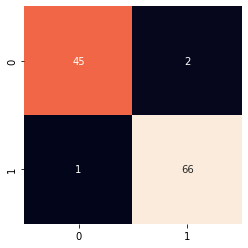

In [ ]:
matrix_confusion = confusion_matrix(y_test, y_pred_DTWP_test)

sns.heatmap(matrix_confusion, square=True, annot=True, fmt='d', cbar=False )
plt.show()

Neural Network

In [ ]:
from keras.layers import Activation, Dense
from keras.models import Sequential 

model = Sequential()
model.add(Dense(32, input_dim=30))
model.add(Activation('relu'))
model.add(Dense(2, input_dim=32))
model.add(Activation('softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                992       
                                                                 
 activation (Activation)     (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 2)                 66        
                                                                 
 activation_1 (Activation)   (None, 2)                 0         
                                                                 
Total params: 1,058
Trainable params: 1,058
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer = 'sgd', loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
y_train = np_utils.to_categorical(y_train, 2)
y_test = np_utils.to_categorical(y_test, 2)

In [ ]:
y_train[0]

array([0., 1.], dtype=float32)

In [ ]:
print(y_train.shape)

(455, 2)


In [ ]:
training = model.fit(X_train, y_train, batch_size = 100, epochs = 150, verbose = 0, validation_data=(X_test,y_test))

In [ ]:
performance = model.evaluate(X_test, y_test, verbose=0)

print("test score", performance[0]) 
print("test accuracy", performance[1])


test score 0.6819791197776794
test accuracy 0.5877193212509155


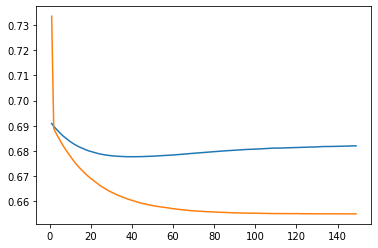

In [ ]:
x = list(range(150))
vy = training.history['val_loss']
ty = training.history['loss']

plt.plot( x[1:], vy[1:] )
plt.plot( x[1:], ty[1:] )
plt.show()